# Derivation with ChatGPT

![Derivation with ChatGPT](../assets/chatgpt_derivation.png)

Let's consider the following function:


$$ f(x) = \dfrac{x^2cos(x) - x}{10} $$


We will ask ChatGPT to provide a detailed explanation on how to calculate the first-order differential. Then we will ask ChatGPT to implement it in Python. To verify the result we will use automatic differentiation and compare the results.

## ChatGPT Implementation
We ask ChatGPT the following:

```text
Can you calculate and show all the steps of the derivative of the following equation: 1/10 * (x**2 * cos(x) - x) 
```

after which ChatGPT provides all the steps:

```text
Yes, I can certainly help you with that!

To find the derivative of the function f(x) = 1/10 * (x**2 * cos(x) - x), we can apply the product rule and the chain rule as necessary. Here are the steps:

1. Start by applying the constant multiple rule, which says that if f(x) = kg(x), where k is a constant, then f'(x) = kg'(x). Using this rule, we can simplify the expression for f(x) to:
f(x) = 1/10 * (x2 * cos(x) - x) = (1/10 * x2 * cos(x)) - (1/10 * x)

2. Next, we can use the sum and difference rule to take the derivative of each term separately. The derivative of the first term is:
d/dx (1/10 * x2 * cos(x)) = (1/10) * [d/dx (x2)] * cos(x) + (1/10) * [d/dx (cos(x))] * x**2

3. To find these derivatives, we can use the product rule and the chain rule. First, we apply the product rule to the first term:
d/dx (x**2) = 2x

4. Next, we apply the chain rule to the second term, since we have a function of x inside the cosine function:
d/dx (cos(x)) = -sin(x) * d/dx (x) = -sin(x)

5. Substituting these results back into our original expression, we get:
d/dx (1/10 * x2 * cos(x)) = (1/10) * (2x * cos(x) - sin(x) * x2)

6. The derivative of the second term is easier to find:
d/dx (1/10 * x) = 1/10

7. Putting it all together, we get:
f'(x) = d/dx (1/10 * x2 * cos(x)) - d/dx (1/10 * x)
= (1/10) * (2x * cos(x) - sin(x) * x2) - (1/10)
= (1/10) * (2x * cos(x) - sin(x) * x**2 - 1)

Therefore, the derivative of f(x) is f'(x) = (1/10) * (2x * cos(x) - sin(x) * x**2 - 1).
```

Then, we ask ChatGPT:
```text
Can you code the above explanation in Python using Numpy?
```

upon which the answer is coded below:

In [1]:
import numpy as np

def f_chatgpt(x):
    return 1/10 * (x**2 * np.cos(x) - x)

def df_chatgpt(x):
    return 1/10 * (2*x*np.cos(x) - x**2*np.sin(x) - 1)

## Let's verify
We will use JAX to make automatic differentiation of the same function. Then we compare the results.

In [2]:
from typing import Callable

import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit, vmap

%matplotlib inline

In [3]:
def f_jax(x):
    return 1/10 * (x**2 * jnp.cos(x) - x)

jax_grad_f = jit(grad(f_jax))
jax_elementwise_grad = jit(vmap(jax_grad_f))

In [4]:
x_start, x_stop = -10, 10
num_points = 1000

np_x = np.linspace(x_start, x_stop, num_points, dtype=np.float32)
jax_x = jnp.linspace(x_start, x_stop, num_points, dtype=jnp.float32)

fp_chatgpt = df_chatgpt(np_x)
fp_jax = jax_elementwise_grad(jax_x)

# there is some loss in converting jax array to numpy
np.allclose(fp_chatgpt, fp_jax, atol=1.e-5)

True

## Plot the derivative

In [5]:
def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    """Helper function to set up the plot options"""
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")

In [6]:
def plot_derivative(f: Callable, fp: Callable, f_str: str):
    """Plot the function and its derivative

    Args:
        f (Callable): the input function to find the minimum
        fp (Callable): the derivative of the input function
        f_str (str): title
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

    # limits
    x_start, x_stop = -10, 10
    y_start, y_stop = -12, 10

    num_points = 500

    # plot f
    xs = np.linspace(x_start, x_stop, num_points)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot f'
    xs = np.linspace(x_start, x_stop, num_points)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")


    show([x_start, x_stop, y_start, y_stop], ax=ax1, ylabel="$f(x)$",
        title=r"$f(x)=" + f_str + "$")

    show([x_start, x_stop, y_start, y_stop], ax=ax2, ylabel="$f'(x)$",
        title=r"$y=f'(x)$")
    
    plt.show()

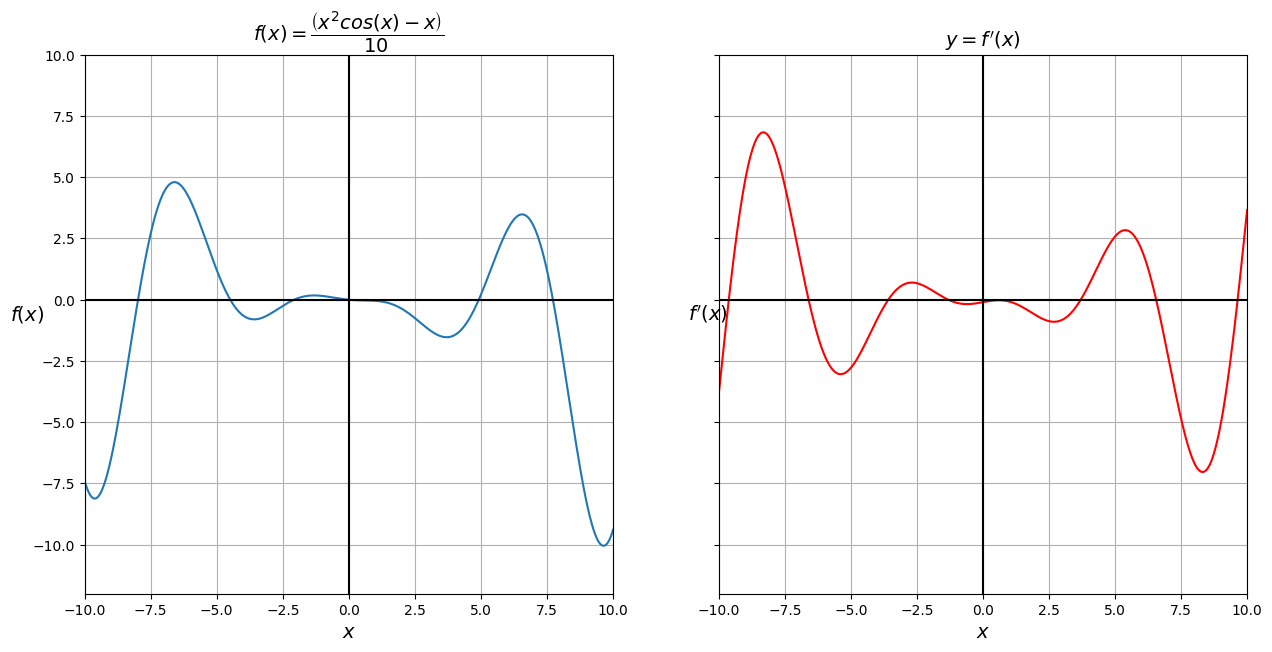

In [7]:
plot_derivative(f_chatgpt, df_chatgpt, r"\dfrac{\left(x^2cos(x) - x\right)}{10}")